<a href="https://colab.research.google.com/github/BartoszJanJerzy/data-science-bootcamp/blob/master/12_case_study_google_appstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [ ]:
url = 'http://storage.googleapis.com/esmartdata-courses-files/ds-bootcamp/appstore_games.csv'
df_raw = pd.read_csv(url)

df_raw.head()

## Wstępne przygotowanie **danych**

In [5]:
# jakie mamy kolumny?
df_raw.columns

Index(['URL', 'ID', 'Name', 'Subtitle', 'Icon URL', 'Average User Rating',
       'User Rating Count', 'Price', 'In-app Purchases', 'Description',
       'Developer', 'Age Rating', 'Languages', 'Size', 'Primary Genre',
       'Genres', 'Original Release Date', 'Current Version Release Date'],
      dtype='object')

In [6]:
# dobrze zrobić kopię, na której się pracuje
df = df_raw.copy()

# usuwanie kolumn niepotrzebnych do analizy (na kopii)
df = df.drop(columns=['URL','Icon URL','Subtitle','Description','In-app Purchases'])

In [7]:
df.head()

,ID,Name,Average User Rating,User Rating Count,Price,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,284921427,Sudoku,4.0,3553.0,2.99,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,284926400,Reversi,3.5,284.0,1.99,Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,284946595,Morocco,3.0,8376.0,0.00,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,285755462,Sudoku (Free),3.5,190394.0,0.00,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,285831220,Senet Deluxe,3.5,28.0,2.99,RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [9]:
# zmiana indeksu
df.set_index('ID', inplace=True)
df.head()

,Name,Average User Rating,User Rating Count,Price,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
ID,,,,,,,,,,,,
284921427,Sudoku,4.0,3553.0,2.99,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
284926400,Reversi,3.5,284.0,1.99,Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
284946595,Morocco,3.0,8376.0,0.00,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
285755462,Sudoku (Free),3.5,190394.0,0.00,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
285831220,Senet Deluxe,3.5,28.0,2.99,RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [12]:
# statystyki opisowe dla danych liczbowych
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Average User Rating,7561.0,4.060905e+00,7.514275e-01,1.0,3.5,4.5,4.5,5.000000e+00
User Rating Count,7561.0,3.306531e+03,4.232256e+04,5.0,12.0,46.0,309.0,3.032734e+06
Price,16983.0,8.134187e-01,7.835732e+00,0.0,0.0,0.0,0.0,1.799900e+02
Size,17006.0,1.157064e+08,2.036477e+08,51328.0,22950144.0,56768954.0,133027072.0,4.005591e+09


In [14]:
# statystyki opisowe dla wybranych typów danych
df.describe(include=['object']).T

,count,unique,top,freq
Name,17007,16847,Tank Battle: Blitzkrieg,2
Developer,17007,8693,Tapps Tecnologia da Informa\xe7\xe3o Ltda.,123
Age Rating,17007,4,4+,11806
Languages,16947,990,EN,12467
Primary Genre,17007,21,Games,16286
Genres,17007,1004,"Games, Strategy, Puzzle",778
Original Release Date,17007,3084,2/09/2016,75
Current Version Release Date,17007,2512,1/08/2019,118


In [16]:
# standaryzacja nazw kolumn (list comprehension)
df.columns = [col.lower().replace(' ','_') for col in df.columns]
df.columns

Index(['name', 'average_user_rating', 'user_rating_count', 'price',
       'developer', 'age_rating', 'languages', 'size', 'primary_genre',
       'genres', 'original_release_date', 'current_version_release_date'],
      dtype='object')

## Rozkład i zobrazowanie przykładowej zmiennej

In [19]:
# jak wyglada rozkład zmiennej 'age_rating'
df.age_rating.value_counts()

4+     11806
9+      2481
12+     2055
17+      665
Name: age_rating, dtype: int64

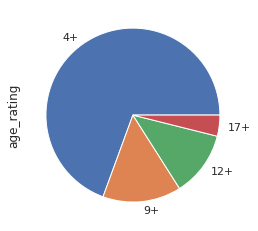

In [23]:
# zobrazowanie rozkładu zmiennej 'age_rating'

import seaborn as sns
sns.set()

_ = df.age_rating.value_counts().plot(kind='pie') # aby nie wyswietlały się techniczne informacje o wyrkesie, można przypsiać go do roboczej zmiennej

## Zbadanie dostepnych językow

In [26]:
df.languages

ID
284921427     DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...
284926400                                                    EN
284946595                                                    EN
285755462     DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...
285831220     DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...
                                    ...                        
1474626442                                                   EN
1474919257                                                   EN
1474962324                                                   EN
1474963671                                                   EN
1475076711                                               EN, ZH
Name: languages, Length: 17007, dtype: object

In [27]:
# rozbicie języków poprzez przecinki
df.languages.str.split(', ')

ID
284921427     [DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, P...
284926400                                                  [EN]
284946595                                                  [EN]
285755462     [DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, P...
285831220     [DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, R...
                                    ...                        
1474626442                                                 [EN]
1474919257                                                 [EN]
1474962324                                                 [EN]
1474963671                                                 [EN]
1475076711                                             [EN, ZH]
Name: languages, Length: 17007, dtype: object

In [28]:
# więc ile dostepnych językó ma każda aplikacja?
df.languages.str.split(', ').str.len()

ID
284921427     17.0
284926400      1.0
284946595      1.0
285755462     17.0
285831220     15.0
              ... 
1474626442     1.0
1474919257     1.0
1474962324     1.0
1474963671     1.0
1475076711     2.0
Name: languages, Length: 17007, dtype: float64

In [30]:
# zróbmy nową zmienną z nowo uzyskana informacją
df['num_lan'] = df.languages.str.split(', ').str.len()
df.head()

,name,average_user_rating,user_rating_count,price,developer,age_rating,languages,size,primary_genre,genres,original_release_date,current_version_release_date,num_lan
ID,,,,,,,,,,,,,
284921427,Sudoku,4.0,3553.0,2.99,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017,17.0
284926400,Reversi,3.5,284.0,1.99,Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018,1.0
284946595,Morocco,3.0,8376.0,0.00,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017,1.0
285755462,Sudoku (Free),3.5,190394.0,0.00,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017,17.0
285831220,Senet Deluxe,3.5,28.0,2.99,RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018,15.0


## Braki danych

In [32]:
# ile mamy braków danych w poszczególnych kolumnach?
df.isnull().sum()

name                               0
average_user_rating             9446
user_rating_count               9446
price                             24
developer                          0
age_rating                         0
languages                         60
size                               1
primary_genre                      0
genres                             0
original_release_date              0
current_version_release_date       0
num_lan                           60
dtype: int64

In [36]:
# metoda do brakó danych -> dropna()